# Weather Image Classification

Let's get the weather image files. These are available from Kaggle at https://www.kaggle.com/datasets/jehanbhathena/weather-dataset.

I downloaded the zip file and stored it in the same directory as this notebook.

In [1]:
! unzip Weather_Image_Classification.zip

/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Archive:  Weather_Image_Classification.zip
  inflating: dataset/dew/2208.jpg    
  inflating: dataset/dew/2209.jpg    
  inflating: dataset/dew/2210.jpg    
  inflating: dataset/dew/2211.jpg    
  inflating: dataset/dew/2212.jpg    
  inflating: dataset/dew/2213.jpg    
  inflating: dataset/dew/2214.jpg    
  inflating: dataset/dew/2215.jpg    
  inflating: dataset/dew/2216.jpg    
  inflating: dataset/dew/2217.jpg    
  inflating: dataset/dew/2218.jpg    
  inflating: dataset/dew/2219.jpg    
  inflating: dataset/dew/2220.jpg    
  inflating: dataset/dew/2221.jpg    
  inflating: dataset/dew/2222.jpg    
  inflating: dataset/dew/2223.jpg    
  inflating: dataset/dew/2224.jpg    
  inflating: dataset/dew/2225.jpg    
  inflating: dataset/dew/2226.jpg    
  inflating: dataset/dew/2227.jpg    
  inflating: dataset/dew/2228.jpg    
  inflating: dataset/dew/2229.jpg   

In [2]:
!ls dataset
!ls dataset/dew

/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
dew	 frost	hail	   rain     rime       snow
fogsmog  glaze	lightning  rainbow  sandstorm
/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2208.jpg  2296.jpg  2384.jpg  2472.jpg	2560.jpg  2648.jpg  2736.jpg  2824.jpg
2209.jpg  2297.jpg  2385.jpg  2473.jpg	2561.jpg  2649.jpg  2737.jpg  2825.jpg
2210.jpg  2298.jpg  2386.jpg  2474.jpg	2562.jpg  2650.jpg  2738.jpg  2826.jpg
2211.jpg  2299.jpg  2387.jpg  2475.jpg	2563.jpg  2651.jpg  2739.jpg  2827.jpg
2212.jpg  2300.jpg  2388.jpg  2476.jpg	2564.jpg  2652.jpg  2740.jpg  2828.jpg
2213.jpg  2301.jpg  2389.jpg  2477.jpg	2565.jpg  2653.jpg  2741.jpg  2829.jpg
2214.jpg  2302.jpg  2390.jpg  2478.jpg	2566.jpg  2654.jpg  2742.jpg  2830.jpg
2215.jpg  2303.jpg  2391.jpg  2479.jpg	2567.jpg  2655.jpg  2743.jpg  2831.jpg
2216.jpg  2304.jpg  2392.jpg  2480.jpg	25

As we can see the **dataset/** has folders with images. Each folder can be designated as the label for these images.

In [3]:
import pathlib
import numpy as np

# We use pathlib because we want to use the glob() method
# that it provies when we get the 
# <class 'pathlib.PosixPath'> object. The glob() merely
# lists files that match the '*' which means list all files.
# The loop simply says for each file in data_dir, get me the 
# name. Since this is with [], it will put it in list context.
# We sort the list and make it into a numpy array.
data_dir = pathlib.Path("dataset/")
class_names = np.array(sorted([file.name for file in data_dir.glob("*")]))
class_names

array(['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain',
       'rainbow', 'rime', 'sandstorm', 'snow'], dtype='<U9')

In [4]:
#Let's visualize our images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  """
  target_dir is the dataset/ where it has sub-directories
  such as dew/, frost/, hail/, etc. Each of these sub-directories
  are also the target_class. So we are display a random image
  from a given target_class
  """
     
  #Set up target directory (we'll vew images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f"Image Name: {random_image}")

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")  #show the shape of the image.
  return img

Image Name: ['2278.jpg']
Image shape: (662, 1024, 3)


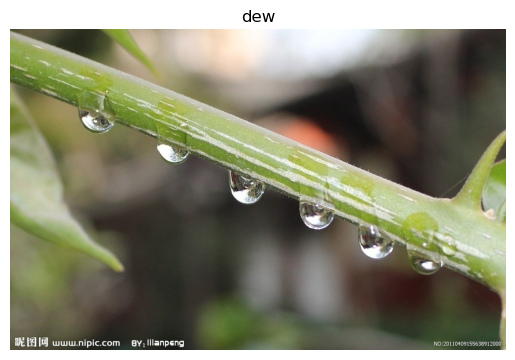

In [5]:
#View a random image from the training dataset
img = view_random_image(target_dir="dataset/",
                        target_class="dew")

Ok. Now we can look at any random image based on a class. This function is more for convenience. Let us now import tensorflow and see how this data is represented in tensors.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
tf.constant(img)

2022-08-28 12:24:28.109958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 12:24:28.113402: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 12:24:28.113509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 12:24:28.114000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

<tf.Tensor: shape=(662, 1024, 3), dtype=uint8, numpy=
array([[[ 71,  74,  47],
        [ 72,  75,  48],
        [ 72,  75,  48],
        ...,
        [ 45,  45,  37],
        [ 46,  46,  38],
        [ 46,  47,  39]],

       [[ 74,  77,  50],
        [ 73,  76,  49],
        [ 73,  76,  49],
        ...,
        [ 44,  44,  36],
        [ 45,  45,  37],
        [ 45,  46,  38]],

       [[ 88,  91,  64],
        [ 82,  85,  58],
        [ 78,  81,  54],
        ...,
        [ 44,  44,  36],
        [ 44,  44,  36],
        [ 43,  44,  36]],

       ...,

       [[ 82,  80,  59],
        [ 81,  79,  58],
        [ 82,  80,  59],
        ...,
        [186, 176, 141],
        [190, 180, 145],
        [193, 183, 148]],

       [[ 82,  80,  59],
        [ 81,  79,  58],
        [ 82,  80,  59],
        ...,
        [193, 182, 150],
        [197, 186, 154],
        [199, 188, 156]],

       [[ 82,  80,  59],
        [ 80,  78,  57],
        [ 81,  79,  58],
        ...,
        [197, 186, 1

In [8]:
# Images are represented digitally in an RGB channel.
# This means there are 3 matrices where each matrix
# represents a color (red, green blue). Ech matrix
# has numbers from 0 to 255 where 0 is low intensity
# and 255 is high intensity. This means for the red
# channel 255 is more red and 0 is less red.
img.shape

(662, 1024, 3)

## An end-to-end example

Let's build a CNN to find patterns in our images, more specifically, we need to:

* Split out dataset of images into a training, testing and validation dataset. Typically this is a 60/20/20 partition. For example if the dataset/dew/ directory has 100 images, we must put 60 of those images in learning/train/dew/, 20 images go to learning/test/dew/ and the last 20 go to learning/validation/dew/.
* Load our images
* Preprocess our images (applying scaling/normalization)
* Build a CNN to find patterns in our images
* Compile a CNN
* Fit the CNN to our training data

In [21]:
# First let's create our train, test and validation directories.
!mkdir learning
!mkdir learning/train learning/test learning/validation
!ls learning
!ls

/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
mkdir: cannot create directory ‘learning’: File exists
/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
mkdir: cannot create directory ‘learning/train’: File exists
mkdir: cannot create directory ‘learning/test’: File exists
mkdir: cannot create directory ‘learning/validation’: File exists
/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
test  train  validation
/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
dataset   Weather_Image_Classification.ipynb
learning  Weather_Image_Classification.zip


In [43]:
import shutil
import os
import re
print(os.walk)

for dirname, _, filenames in os.walk('dataset/'):
    #print(dirname, filename)
    print("Directory = "+dirname)
    #print("Sub-Directory = "+str(subdirname))
    print(f"File count in {dirname} = "+str(len(filenames)))
    #filenames = sorted(filenames)
    if len(filenames) > 0:
        train_files = filenames[0:int(0.6*len(filenames))]
        test_files = filenames[int(0.6*len(filenames)):int(0.8*len(filenames))]
        valid_files = filenames[int(0.8*len(filenames)):len(filenames)]
        print("count of train_files = "+str(len(train_files)))
        print("count of test_files = "+str(len(test_files)))
        print("count of valid_files = "+str(len(valid_files)))
        for file in train_files:
            dir1, dir2 = dirname.split("/")
            newpath = "learning/train/"+dir2+"/"
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            shutil.copy(dirname+"/"+file, newpath)
        for file in test_files:
            dir1, dir2 = dirname.split("/")
            newpath = "learning/test/"+dir2+"/"
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            shutil.copy(dirname+"/"+file, newpath)
        for file in valid_files:
            dir1, dir2 = dirname.split("/")
            newpath = "learning/validation/"+dir2+"/"
            if not os.path.exists(newpath):
                os.makedirs(newpath)
            shutil.copy(dirname+"/"+file, newpath)

<function walk at 0x7f550323f760>
Directory = dataset/
File count in dataset/ = 0
Directory = dataset/frost
File count in dataset/frost = 475
count of train_files = 285
count of test_files = 95
count of valid_files = 95
Directory = dataset/sandstorm
File count in dataset/sandstorm = 692
count of train_files = 415
count of test_files = 138
count of valid_files = 139
Directory = dataset/rain
File count in dataset/rain = 526
count of train_files = 315
count of test_files = 105
count of valid_files = 106
Directory = dataset/fogsmog
File count in dataset/fogsmog = 851
count of train_files = 510
count of test_files = 170
count of valid_files = 171
Directory = dataset/glaze
File count in dataset/glaze = 639
count of train_files = 383
count of test_files = 128
count of valid_files = 128
Directory = dataset/dew
File count in dataset/dew = 698
count of train_files = 418
count of test_files = 140
count of valid_files = 140
Directory = dataset/rainbow
File count in dataset/rainbow = 232
count of t

In [44]:
!ls

/bin/bash: /home/krismatrix/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
dataset   Weather_Image_Classification.ipynb
learning  Weather_Image_Classification.zip


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values b/w 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "learning/train"
test_dir = "learning/test"

#Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                       batch_size=32,     #standard batch_size used in CNN's
                                       target_size=(224,224), #(height, width) to which images should be resized to.
                                       class_mode="categorical", #determines the type of label arrays that are returned
                                       seed=42)            #random seed for shuffling and transformations.

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)

# Build a CNN Model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),    
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                  
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Found 4113 images belonging to 11 classes.
Found 1371 images belonging to 11 classes.


In [51]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

NameError: name 'scipy' is not defined